In [2]:
import pandas as pd
import os
import csv
import matplotlib.pyplot as plt

In [3]:
file = r"E:\Onedrive\OneDrive - Louis Dreyfus Company\Personal\STUDY\POSTECH\FASE1\producao\Producao.csv"
dados = pd.read_csv(file,sep=',')
dados.head

<bound method NDFrame.head of     id                           tipo  \
0    2                  VINHO DE MESA   
1    3                  VINHO DE MESA   
2    4                  VINHO DE MESA   
3    6  VINHO FINO DE MESA (VINÍFERA)   
4    7  VINHO FINO DE MESA (VINÍFERA)   
5    8  VINHO FINO DE MESA (VINÍFERA)   
6   10                           SUCO   
7   11                           SUCO   
8   12                           SUCO   
9   13                           SUCO   
10  14                           SUCO   
11  16                      DERIVADOS   
12  17                      DERIVADOS   
13  18                      DERIVADOS   
14  19                      DERIVADOS   
15  20                      DERIVADOS   
16  21                      DERIVADOS   
17  22                      DERIVADOS   
18  23                      DERIVADOS   
19  24                      DERIVADOS   
20  25                      DERIVADOS   
21  26                      DERIVADOS   
22  27                     

In [4]:
dfproducao_melt = pd.melt(dados,id_vars=['id','tipo','produto'],var_name='ano',value_name="Total")
dfproducao_melt
dfproducao_melt.to_csv('dfproducao_melt.csv',index=False,sep=";")

In [5]:
dfproducao = dfproducao_melt[(dfproducao_melt['tipo'] == 'VINHO DE MESA') | (dfproducao_melt['tipo'] == 'VINHO FINO DE MESA (VINÍFERA)')]
dfproducao_group = dfproducao.groupby(['produto', 'ano'])['Total'].sum().reset_index()
dfproducao_group = dfproducao_group.rename(columns={'produto':'vinho'})
dfproducao_group

,vinho,ano,Total
0,Branco,2006,44988359
1,Branco,2007,59716980
2,Branco,2008,61754624
3,Branco,2009,60578253
4,Branco,2010,48421110
5,Branco,2011,68746930
6,Branco,2012,55585487
7,Branco,2013,53972752
8,Branco,2014,57492873
9,Branco,2015,59119216


https://agenciabrasil.ebc.com.br/economia/noticia/2016-04/quebra-de-57-na-safra-da-uva-e-maior-ja-registrada-no-rio-grande-do-sul

2016 outlier com quebra de 57% de produção das uvas

https://g1.globo.com/economia/noticia/producao-mundial-de-vinho-registra-o-pior-nivel-em-mais-de-50-anos.ghtml

2017 ano com maior produção de vinhos da história do país, porém dados são limitados a apenas uma viticultura

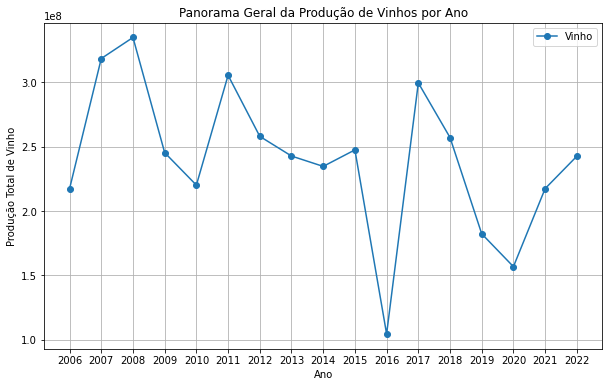

In [7]:
plt.figure(figsize=(10, 6))
dfproducao_panorama = dfproducao_group.groupby([ 'ano'])['Total'].sum().reset_index()
plt.plot(dfproducao_panorama['ano'], dfproducao_panorama['Total'], marker='o', label="Vinho")
plt.title('Panorama Geral da Produção de Vinhos por Ano')
plt.xlabel('Ano')
plt.ylabel('Produção Total de Vinho')
plt.grid(True)
plt.legend()
plt.show()

In [8]:
dfproducao_panorama

,ano,Total
0,2006,217269864
1,2007,318464392
2,2008,334841312
3,2009,245318774
4,2010,220073693
5,2011,305439220
6,2012,257977767
7,2013,242686752
8,2014,234637437
9,2015,247457542
